In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import retrieval_functions as rf
import importlib
importlib.reload(rf)
rf.init_plotting()

In [14]:
experiment="01_Multiplication"
data=[]
for framework in ["MPyC","MP-SPDZ","MOTION"]:
    path= "..\..\Ergebnisse\Deviation\\"+framework+"\\"+experiment+"\data\short_results.csv"
    frame=pd.read_csv(path ,header=0,sep=';',index_col=False,engine='python')
    frame['framework']=framework
    if framework=="MPyC":
        # assuming your dataframe is df and the time column is 'time'
        frame['runtime_internal(s)'] = pd.to_datetime(frame['runtime_internal(s)'], format='%H:%M:%S.%f').dt.time

        # convert time to seconds
        frame['runtime_internal(s)'] = frame['runtime_internal(s)'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second + t.microsecond*1e-6)
        frame['peakRAM(MiB)']= frame['peakRAM(MiB)']
    elif framework=="HPMPC":
        factor = 1
        if frame['splitroles'].max() == 1:
            factor = 6	
        elif frame['splitroles'].max() == 2:
            factor = 24
        else:
            factor=1
        frame['runtime_external(s)'] = pd.to_numeric(frame['runtime_external(s)'])* frame['threads'].max()*factor
    data.append(frame)

In [5]:
import os

path = "..\\..\\Ergebnisse\\Deviation\\"
framworks =[ "MPyC","MP-SPDZ","MOTION","HPMPC"]
fl_paths = []
for framework in framworks:
    path_f= path+framework
    for root, dirs, files in os.walk(path_f):
        for dir in dirs:
            folder_path = os.path.join(root, dir)
            if root == path_f:
                fl_paths.append(folder_path)


In [8]:
import pandas as pd


In [32]:
fl_paths

['..\\..\\Ergebnisse\\Deviation\\MPyC\\01_Multiplication',
 '..\\..\\Ergebnisse\\Deviation\\MPyC\\02_Compare',
 '..\\..\\Ergebnisse\\Deviation\\MPyC\\03_Share',
 '..\\..\\Ergebnisse\\Deviation\\MPyC\\04_LogReg',
 '..\\..\\Ergebnisse\\Deviation\\MPyC\\05_Reveal',
 '..\\..\\Ergebnisse\\Deviation\\MPyC\\06_LeNet',
 '..\\..\\Ergebnisse\\Deviation\\MPyC\\07_Aes',
 '..\\..\\Ergebnisse\\Deviation\\MPyC\\08_SecureMean',
 '..\\..\\Ergebnisse\\Deviation\\MPyC\\09_SecureMin',
 '..\\..\\Ergebnisse\\Deviation\\MPyC\\10_PSI',
 '..\\..\\Ergebnisse\\Deviation\\MPyC\\11_Auction',
 '..\\..\\Ergebnisse\\Deviation\\MPyC\\12_VGG',
 '..\\..\\Ergebnisse\\Deviation\\MPyC\\13_LeNet4nodes',
 '..\\..\\Ergebnisse\\Deviation\\MPyC\\14_PSI4nodes',
 '..\\..\\Ergebnisse\\Deviation\\MPyC\\15_BitAND',
 '..\\..\\Ergebnisse\\Deviation\\MPyC\\16_Division',
 '..\\..\\Ergebnisse\\Deviation\\MP-SPDZ\\01_Multiplication',
 '..\\..\\Ergebnisse\\Deviation\\MP-SPDZ\\02_Compare',
 '..\\..\\Ergebnisse\\Deviation\\MP-SPDZ\\03_Share'

In [33]:
fl_paths[60].split("\\")[-2]

'HPMPC'

In [37]:
runtime=0
for path in fl_paths:
    if path.split("\\")[-2]=="MOTION" and path.split("\\")[-1]=="15_BitAND":
        continue
    
    frame=pd.read_csv(path+"\\data\\short_results.csv" ,header=0,sep=';',index_col=False,engine='python')
    frame['framework']=path.split("\\")[-2]
    framework=path.split("\\")[-2]
    if framework=="MPyC":
        # assuming your dataframe is df and the time column is 'time'
        frame['runtime_internal(s)'] = pd.to_datetime(frame['runtime_internal(s)'], format='%H:%M:%S.%f').dt.time

        # convert time to seconds
        frame['runtime_internal(s)'] = frame['runtime_internal(s)'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second + t.microsecond*1e-6)
        frame['peakRAM(MiB)']= frame['peakRAM(MiB)']
    elif framework=="HPMPC":
        factor = 1
        if frame['splitroles'].max() == 1:
            factor = 6	
        elif frame['splitroles'].max() == 2:
            factor = 24
        else:
            factor=1
        frame['runtime_external(s)'] = pd.to_numeric(frame['runtime_external(s)'])* frame['threads'].max()*factor+10
    runtime+=frame['runtime_external(s)'].sum()+3*8*60

In [39]:
runtime/3600

180.09423610222214

In [16]:
bandwidth,label=rf.get_bandwidth_deviation(data)
latency,label=rf.get_latency_deviation(data)
packetdrop,label=rf.get_packetdrop_deviation(data)

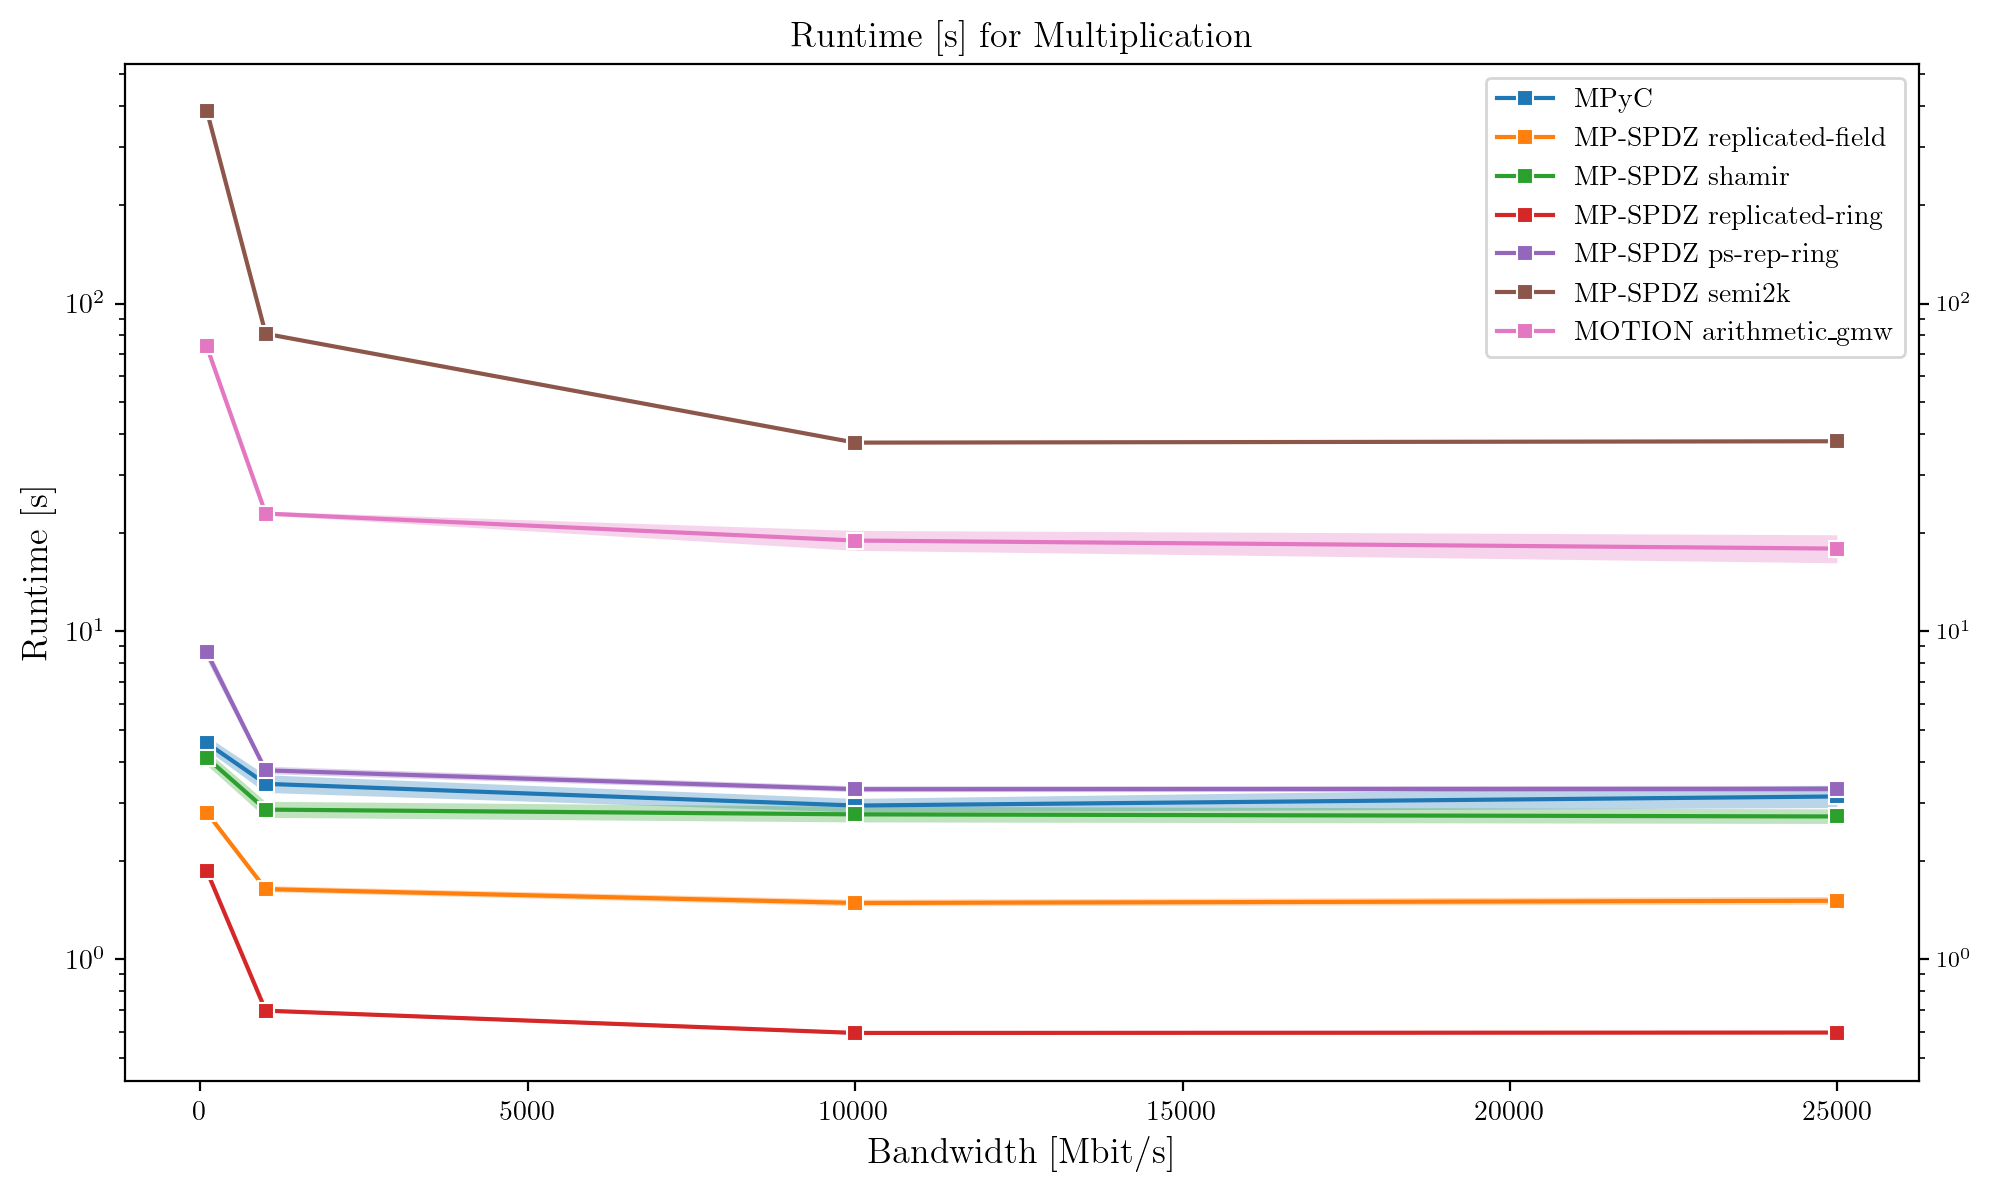

In [17]:
rf.plot_deviation(bandwidth,label,"test.png",experiment,"Bandwidth [Mbit/s]","Runtime [s]",True)

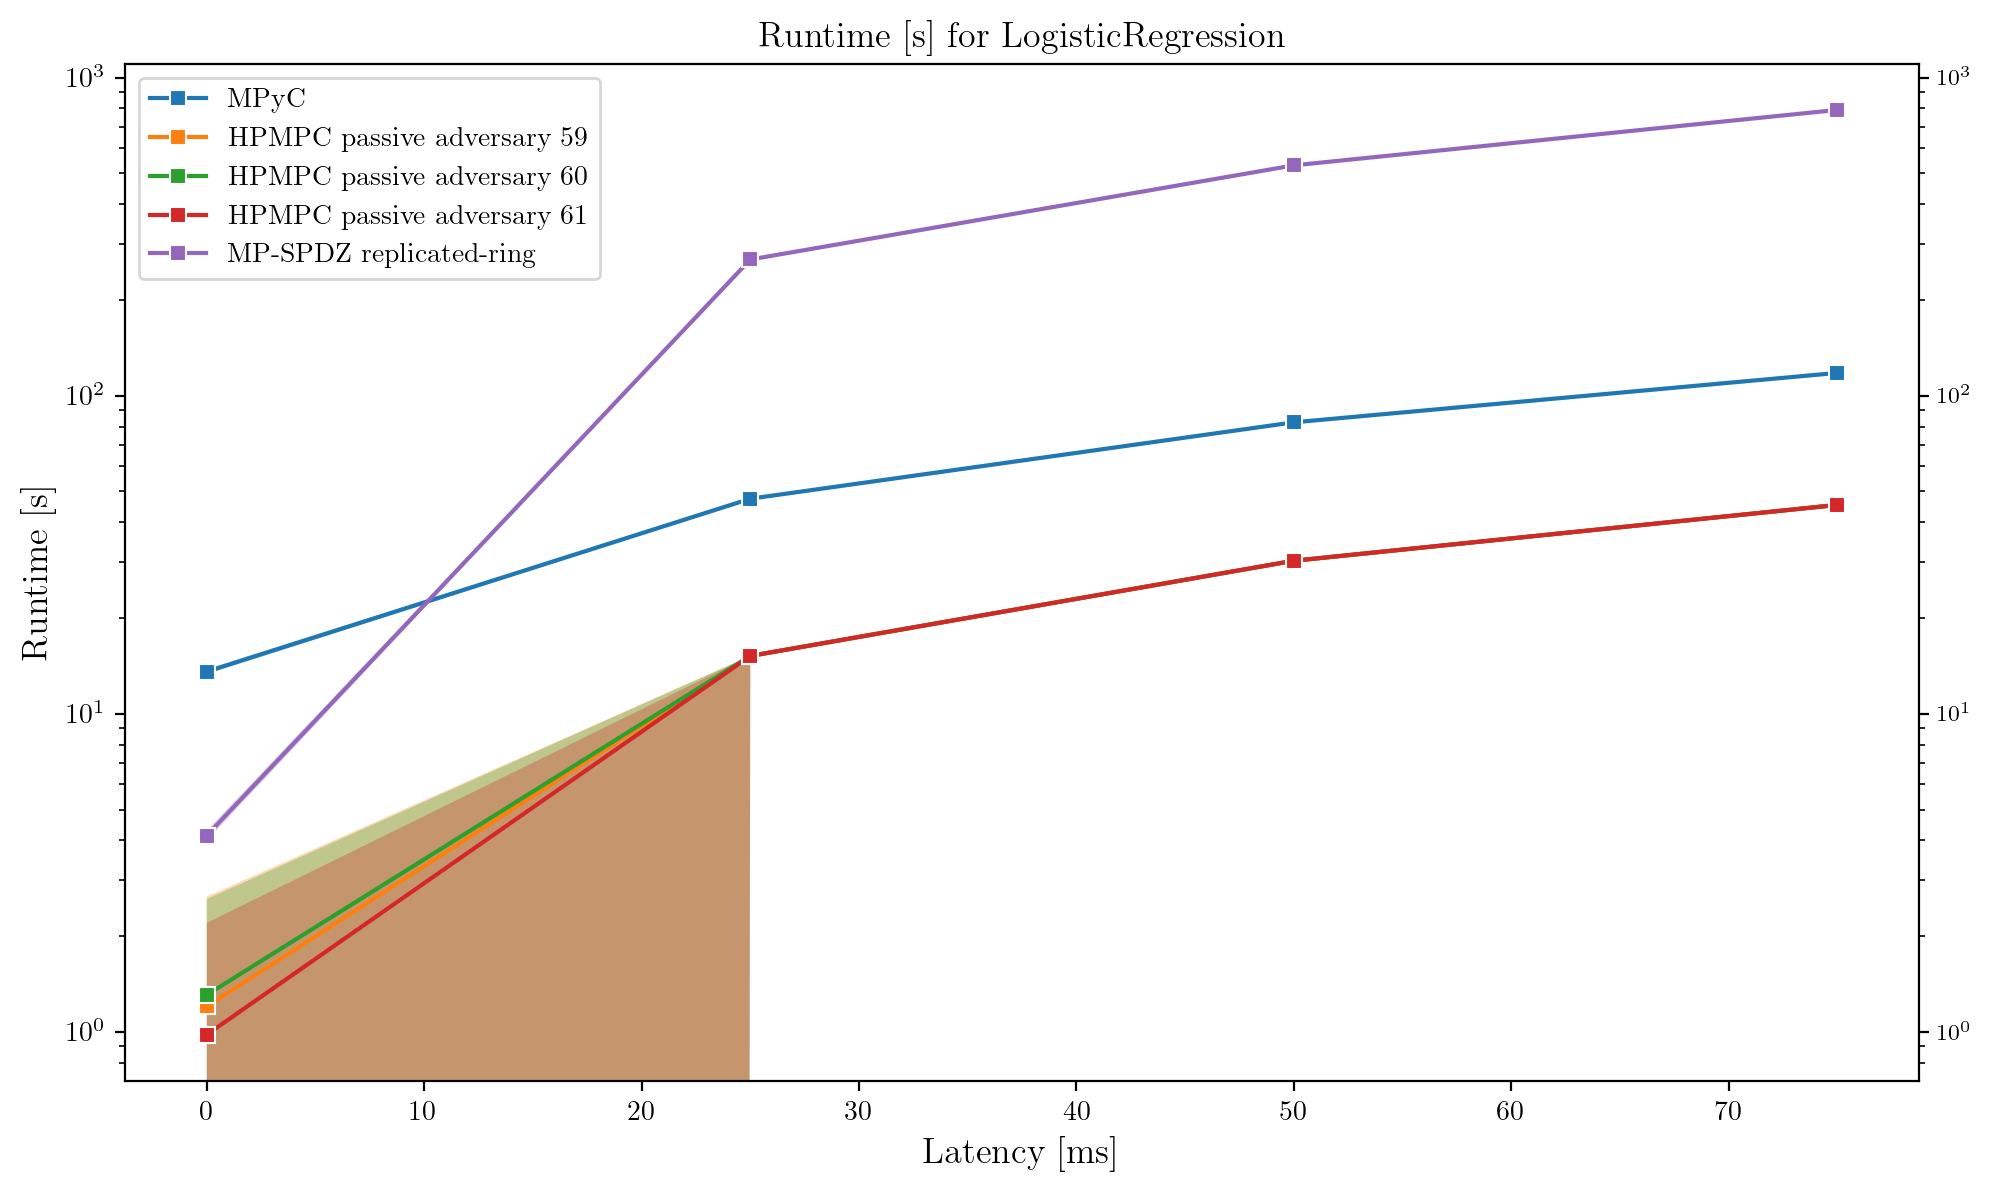

In [213]:
rf.plot_deviation(latency,label,"test.png","04_LogisticRegression","Latency [ms]","Runtime [s]",True)

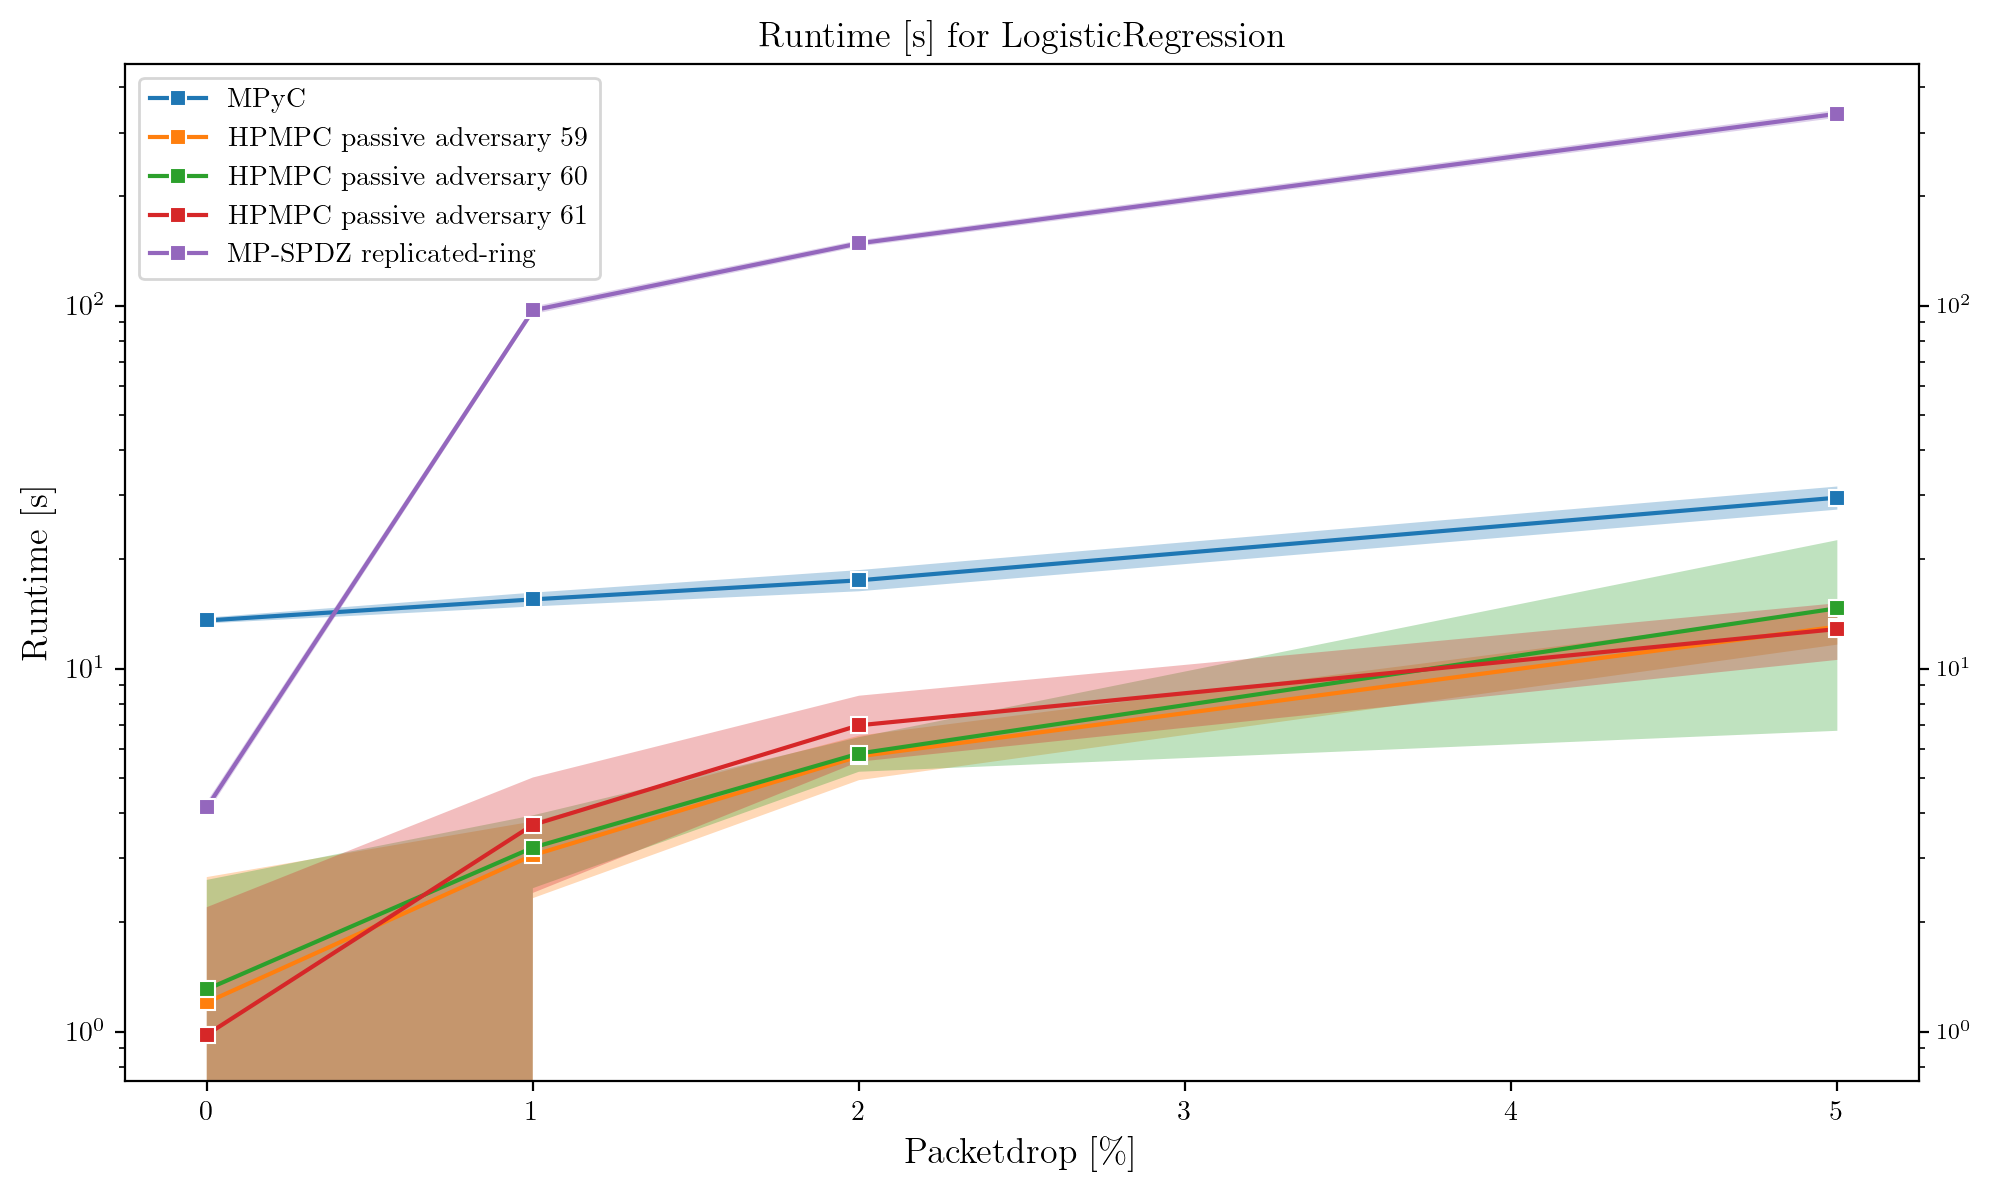

In [214]:
rf.plot_deviation(packetdrop,label,"test.png","04_LogisticRegression","Packetdrop [\%]","Runtime [s]",True)

In [218]:
[df['mean'].iloc[0] for df in bandwidth]

[13.999, 0.1, 0.11000000000000001, 0.094, 8.294]

In [225]:
[df['mean'].iloc[0] for df in bandwidth]
[df['std'].iloc[0] for df in bandwidth]

[0.210420214491543,
 0.04320493798938573,
 0.050332229568471665,
 0.03238655413730965,
 0.08324662155306986]

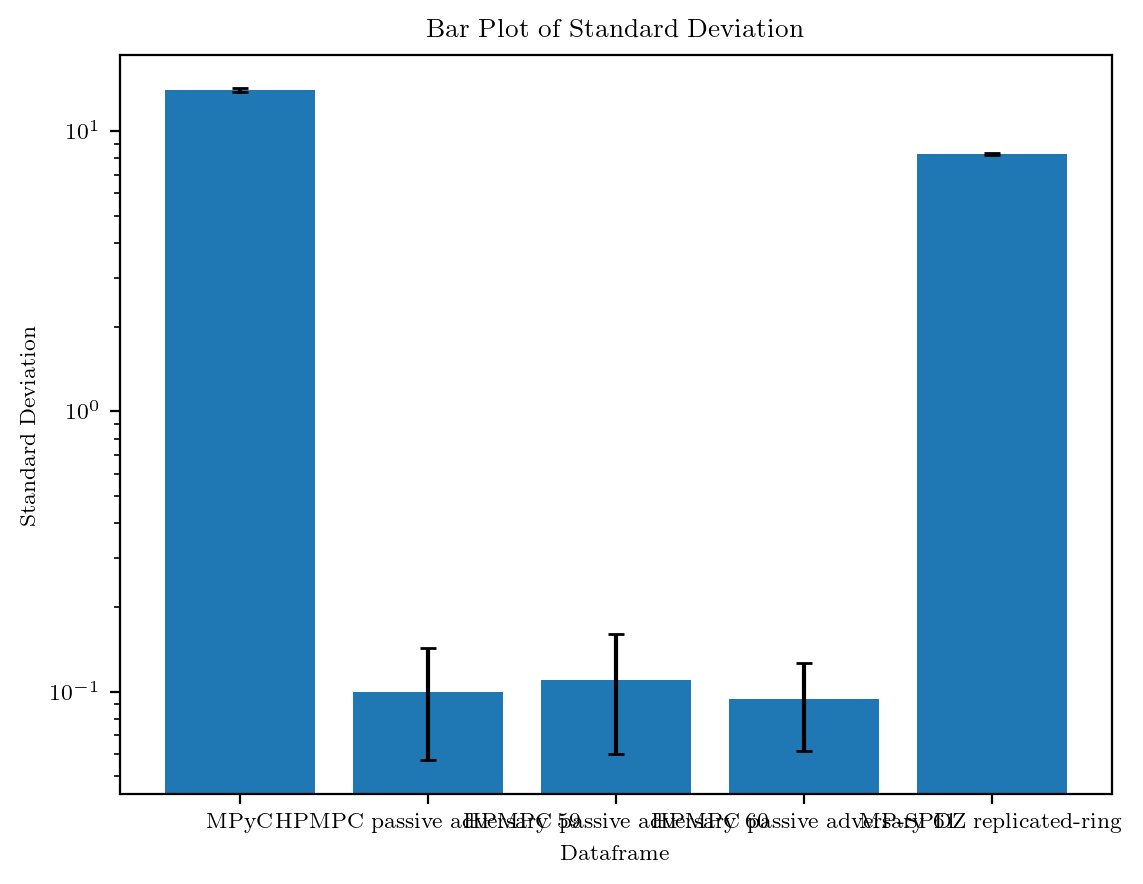

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the 'mean' and 'std' values separately
mean_values = [df['mean'].iloc[0] for df in bandwidth]
std_values = [df['std'].iloc[0] for df in bandwidth]

# Create a bar plot with 'mean' values as the height of the bars and 'std' values as standard deviation
fig, ax = plt.subplots()
ax.bar(label, mean_values,yerr=std_values,capsize=3)

# Add labels and title
plt.xlabel('Dataframe')
plt.ylabel('Standard Deviation')
plt.title('Bar Plot of Standard Deviation')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Show the plot
plt.show()
